![Astrofisica Computacional](../logo.PNG)

---
## 01. Ordinary Differential Equations (ODEs) I


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook some of the methods to solve a system of Ordinary Differential Equations will be presented.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3`

---

## Ordinary Differential Equations (ODE)

A system of first-order ordinary differential equations (ODEs) is a relation between an unknown (vector) function $y(x)$ and its derivative $y^\prime(x)$. A general system of first-order ODEs can be written in the form

\begin{equation}
y^\prime (x) =f(x,y(x))\,.
\end{equation}

A solution of the differential equation is a function $y(x)$ that satisfies the ODE.

In general, there are two classes of first-order ODE problems:

1. Initial value problems : $y(x_i)$ is given at an initial point $x_i$.

2. Boundary value problems (at two points): $y$ is conicit at two extremes (boundaries) of the domain and these **boundary conditions** must be satisfied simultaneously.





---
### Reduction to a first-order ODE problem

Any ODE can be reduced to a first-order problem by introducing additional variables.

#### Example

\begin{equation}
y''(x) + q(x) y'(x) = r(x)\,\,.
\end{equation}

Introducing a new function $z(x)$, this system can be written as a first-order ODE system,

\begin{align}
\text{(1)}\,\, y'(x) &= z(x)\\
\text{(2)}\,\, z'(x) &= r(x) - q(x) z(x).
\end{align}

---
## Explicit and Implicit Methods to solve ODEs

In general terms, the methods to integrate a system of ODEs are classified as *explicit* and *implicit*.

Explicit methods use differences to build and update the solution using the current and previous values of the variables. Some examples of explicit methods are the Euler method and the Runge-Kutta methods.

Implicit methods evaluate the right-hand side of differential equations using the new value of the function being searched for.

---
## Errors and ODEs

All procedures for numerically solving a system of initial value ODEs involve transforming the continuous differential equations into a discrete iterative process that starts from an initial condition and returns the function values ​​$y(x)$ at points $x_m = x_0 + m * h$, where $h$ is the discretization step (which will be assumed constant in this description).

Two kinds of error can arise in these procedures:

1. **Rounding error.** Due to the limited precision of floating point numbers. The global rounding error is the sum of the local floating point errors (at each iteration step).


2. **Truncation error.**

* Local: The error associated with each of the steps when the continuous description (e.g. a derivative) is replaced with a discrete description (e.g., finite differences).

* Global: If the local truncation error is $\mathcal{O}(h^{n+1})$, then the global truncation error will be $\mathcal{O}(h^n)$ because the number of steps used to evaluate derivatives until reaching an arbitrary point $x_f$, starting from $x_0$, is $\frac{x_f - x_0}{h}$.

---
---

## Euler's method

Consider the following system of ODEs,

\begin{equation}
y' = f(x,y)
\end{equation}

with the initial condition $y(x_0) = y_0$. We will introduce a fixed step size $\Delta x$ and obtain an estimate for $y(x)$ at the point $x_1 = x_0 + \Delta x$ using Taylor's theorem,

\begin{equation}
\begin{aligned}
y(x_1) &= y(x_0+\Delta x) = y(x_0) + y'(x_0) \Delta x + \mathcal{O}(\Delta x^2)\,,\\
       &= y(x_0) + \Delta x f(x_0,y(x_0)) + \mathcal{O}(\Delta x^2)\,.
\end{aligned}
\end{equation}


In the same way, the value $y_{n+1}$ of the function at the point $x_{n+1} = x_0 + (n+1) \Delta x$ is obtained by

\begin{equation}
y_{n+1} = y(x_{n+1}) = y_n + \Delta x f(x_n,y(x_n)) + \mathcal{O}(\Delta x^2)\,.
\end{equation}


This is known as the **forward Euler method**.

---
Euler's method is extremely simple, but it can be imprecise and potentially unstable.

The error of this method scales as $\propto \Delta x^2$ locally. However, if $L$ is the length of the domain, then $\Delta x = L / N$, where $N$ is the number of subintervals defined in the domain. Since $N$ integration steps are being taken, the global error will be $\propto N \Delta x^2 = N L^2 / N^2 = L L/N \propto \Delta x$.

Therefore, the forward Euler method is globally first-order accurate.


### Stability

Forward Euler is an **explicit** method. This means that the value $y_{n+1}$ is given explicitly in terms of known quantities like $y_n$ and $f(x_n,y_n)$.
 
Explicit methods are simple and efficient but a suitable step size (usually small) must be used to ensure stability.

### Example. Radiative Transfer Equation

We will consider electromagnetic radiation passing through matter. In general, the intensity of the radiation will not remain constant because along its path, it can lose or gain energy by absorption or emission processes.

In the case of a ray of light with intensity $I$ that passes through a material with *absorption coefficient* $\alpha$, a differential problem can be established that represents the loss of intensity when traveling a distance $ds$ as follows:

\begin{equation}
\frac{dI}{ds} = -\alpha I\,\,, \hspace{1cm}\text{with} \hspace{1cm}
I(0) = 1\,,\,\, \alpha > 0\,\,.
\end{equation}

By convention, a positive value of $\alpha$ represents that the beam loses energy and the original intensity of the beam will be considered to be normalized to $1$.


It is clear that the exact solution of this problem is $I(s) = e^{-\alpha s}$, which is stable and smooth with $I(0) = 1$ and $I(\infty) = 0 $.

Applying the forward Euler method, we have

\begin{equation}
I_{n+1} = I_n - \alpha \, \Delta s \, I_n = (1-\alpha \Delta s) I_{n}
\end{equation}

\begin{equation}
I_{n+1} = (1 - α \Delta s)^2 I_{n-1} = \cdots = (1 - α \Delta s)^{n+1} I_0\,\,.
\end{equation}

This implies that, to prevent any possible amplification of errors, it must be ensured that $|1 - α Δ s|<1$.

Indeed, three possible cases can be identified

| | | |
|:-: | :-: | :--|
| $0 < 1- \alpha \Delta s < 1$ | : | $(1- \alpha \Delta s)^{n+1}$ decays (pretty cool!) |
|$-1 < 1- α \Delta s < 0$ | : | $(1- \alpha \Delta s)^{n+1}$ oscillates (not so good!)|
|$1- \alpha \Delta s < -1$ | : | $(1- \alpha \Delta s)^{n+1}$ oscillates and diverges (too bad!)|


This analysis gives a stability criterion for the method when $0< \Delta s < \frac{1}{\alpha}$.

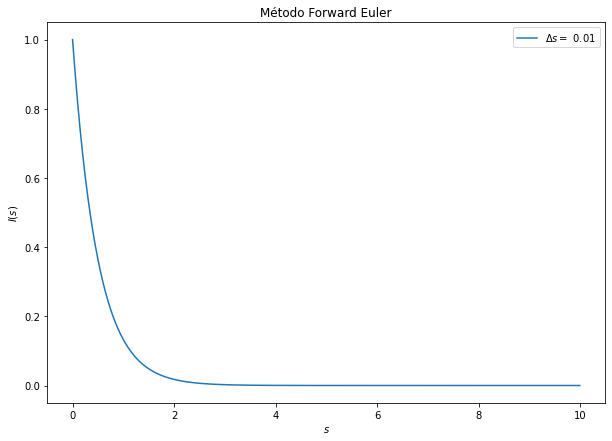

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def ODE(s,I):
    alpha = 2.  # Absorption coefficient
    rhs = -alpha*I
    return rhs


def FEuler(ODE, t0, q0, tf, n):
    '''
    ------------------------------------------
    FEuler(ODE, t0, q0, tf, n)
    Forward Euler's method for solving a ODEs 
    system.
    ------------------------------------------
    Arguments:
    ODE:function with the ODE system 
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs 
    t0: independent parameter final value
    n : Number of steps to perform
    ------------------------------------------
    Dependences: NumPy
    ------------------------------------------
    '''
    dq = (tf - t0)/n
    q = np.zeros([n,len(q0)+1])
    q[0,0] = t0
    q[0,1:] = q0
    for i in range(1,n):
        q[i,0] = q[i-1,0] + dq
        q[i,1] = q[i-1,1] + dq*ODE(q[i-1,0], q[i-1,1])
    return q


# Creation of the Grid
s_0 = 0.
s_f = 10.
n = 1000

ds = (s_f - s_0)/n

# Variables setup

# Initial value
I_0 = np.array([1.])

# Main Loop
I = FEuler(ODE, s_0, I_0, s_f, n)

# Plot
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(I[:,0], I[:,1], label=f'$\Delta s =$ {ds:.2f}')
ax.set_title('Método Forward Euler')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$I(s)$')
plt.legend()
plt.show()

Now we will check the stability of the method.

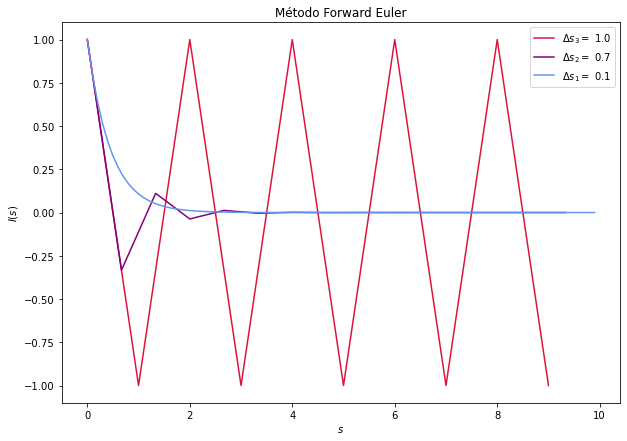

In [2]:

# Initial Condition
I_0 = np.array([1.])

# Creation of the grid
s_0 = 0.
s_f = 10.

# Three stepsizes to compare
n1 = 100
ds1 = (s_f - s_0)/n1

n2 = 15
ds2 = (s_f - s_0)/n2

n3 = 10
ds3 = (s_f - s_0)/n3


I1 = FEuler(ODE, s_0, I_0, s_f, n1)
I2 = FEuler(ODE, s_0, I_0, s_f, n2)
I3 = FEuler(ODE, s_0, I_0, s_f, n3)


fig, ax = plt.subplots(figsize=(10,7))
ax.plot(I3[:,0], I3[:,1], color='crimson', label=f'$\Delta s_3=$ {ds3:.1f}')
ax.plot(I2[:,0], I2[:,1], color='purple', label=f'$\Delta s_2=$ {ds2:.1f}')
ax.plot(I1[:,0], I1[:,1], color='cornflowerblue', label=f'$\Delta s_1=$ {ds1:.1f}')

ax.set_title('Método Forward Euler')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$I(s)$')
plt.legend()
plt.show()

---
## Predictor-Corrector Method

Consider the following modification of Euler's method,

\begin{equation}
y_{n+1} = y_{n} + h\, \frac{f(x_n, y_n) + f(x_{n+1},y_{n+1})}{2}\,\,.
\end{equation}

This can give a better estimate because it uses the *average slope* of $y$.

Note, however, that $y_{n+1}$ is not yet known at this step. To avoid this drawback, the usual forward Euler method can be used to initially estimate the value of $y_{n+1}$ and then use this value in the modification presented above. In this way, the complete method would have the structure

\begin{equation}
\begin{aligned}
y_{n+1}^{(\mathrm{P})} &= y_n + h f(x_n,y_n)\,\,, & \text{(predictor)}\\
y_{n+1} &= y_n + \frac{h}{2} \left[f(x_n,y_n) + f(x_{n+1}, y^{(\mathrm{P})}_{ n+1}) \right]\,\,. & \text{(corrector)}
\end{aligned}
\end{equation}

It is possible to show that the error of the **predictor-corrector method** is locally $\Delta x^3$ and globally $\Delta x^2$. This means that this method is accurate to the second order, while Euler is accurate to the first order.

---
---

## Runge–Kutta methods

The idea behind the Runge-Kutta (RK) methods is to fit the Taylor series expansion of $y(x)$ at $x=x_n$ to the highest possible order.


---
### RK2. Second order RK method

for the system

\begin{equation}
\frac{dy}{dx} = f(x,y)\,\,,
\end{equation}

iteration will be considered

\begin{equation}
y_{n+1} = y_n + a k_1 + b k_2\,\,,
\end{equation}

where

\begin{align}
k_1 &= \Delta x \,f(x_n,y_n)\,\,,\\
k_2 &= \Delta x\,f(x_n+\alpha \Delta x,y_n + \beta k_1)\,\,.
\end{align}

The four unknown parameters $a,b,\alpha,\beta$ are set such that the equation for $y_{n+1}$ agrees with the Taylor series expansion of $y' = f(x,y )$:

\begin{align}
y_{n+1} &= y_n + \Delta x y_n' + \frac{\Delta x^2}{2} y_n'' + \mathcal{O}(\Delta x^3)\,\,,\\
&= y_n + \Delta x f(x_n,y_n) + \frac{\Delta x^2}{2} \frac{d}{dx} f(x_n,y_n) + \mathcal{O}(\Delta x^3) \,\,,\nonumber\\
&= y_n + \Delta x f_n + \Delta x^2 \frac{1}{2}\left( \frac{\partial f_n}{\partial x} + \frac{\partial f_n}{\partial y} f_n \right) + \mathcal{O}(\Delta x^3)\,\,,
\end{align}

where $f_n = f(x_n,y_n)$. Considering the assumption made above,

\begin{equation}
y_{n+1} = y_n + a \Delta x f_n + b \Delta x f(x_n + \alpha \Delta x, y_n + \beta \Delta x f_n)\,\,.
\label{eq:rk2c}
\end{equation}

Expanding the last term in Taylor series to first order $(x_n,y_n)$, we have

\begin{equation}
y_{n+1} = y_n + a \Delta x f_n + b \Delta x\left[ f_n + \frac{\partial f}{\partial x}(x_n,y_n) \alpha \Delta x +
\frac{\partial f}{\partial y}(x_n,y_n) \beta \Delta x f_n \right]\,\,.
\end{equation}

A direct comparison of the results allows to identify the constants

\begin{equation}
a+b = 1\,\,,\hspace{2em} \alpha b = \frac{1}{2}\,\,\hspace{2em} \beta b = \frac{1}{2}\, \,.
\end{equation}


However, it is noted that there are only 3 equations to determine 4 parameters. This means that taking an arbitrary value for one of them, the rest are fixed. A typical choice is

\begin{equation}
\alpha = \beta = \frac{1}{2}\,\,,\hspace{2em} a=0\,\,, \hspace{2em} b = 1\,\,.
\end{equation}

With this, the equations of the RK2 method are obtained:

\begin{align}
k_1 & = \Delta x f(x_n,y_n)\,\,,\\
k_2 & = \Delta x f(x_n + \frac{1}{2}\Delta x, y_n + \frac{1}{2}k_1)\,\,,\\
y_{n+1} & = y_n + k_2 + \mathcal{O}(\Delta x^3)\,\,.
\end{align}

This method is locally $\mathcal{O}(\Delta x^3)$ and globally $\mathcal{O}(\Delta x^2)$.

**Note:** Using $a=b=1/2$ and $\alpha=\beta=1$, the predictor-corrector method is recovered!

---

### RK3

\begin{align}
k_1 &= \Delta x f(x_n,y_n)\,\,\nonumber\\
k_2 &= \Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2} k_1)\,\,,\nonumber\\
k_3 &= \Delta x f(x_n + \Delta x, y_n - k_1 + 2 k_2)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 4 k_2 + k_3) + \mathcal{O}(\Delta x^4)\,\,.
\end{align}


--- 

### RK4

\begin{align}
k_1 &=\Delta x f(x_n,y_n)\,\,,\\
k_2 &=\Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2}k_1)\,\,,\nonumber\\
k_3 &=\Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2}k_2)\,\,,\nonumber\\
k_4 &=\Delta x f(x_n+\Delta x,y_n + k_3)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) + \mathcal{O}(\Delta x^5)\,\,.
\end{align}

---

### Example. Radiative Transfer Equation

Consider again ODE radiative transfer with an absorption coefficient.

\begin{equation}
\frac{dI}{ds} = -\alpha I\,\,, \hspace{1cm}\text{with} \hspace{1cm}
I(0) = 1\,,\,\, α > 0.
\end{equation}

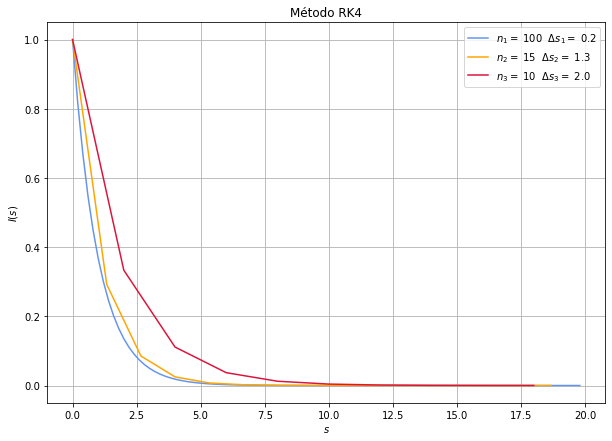

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def ODE(s, I, alpha=1.):
    rhs = -alpha*I
    return rhs

def RK4(ODE, t0, q0, tf, n):
    '''
    ------------------------------------------
    RK4(ODE, t0, q0, tf, n)
    4th Order Runge-Kutta method for solving 
    a system of ODEs.
    ------------------------------------------
    Arguments:
    ODE: function defining the system of ODEs
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    t0: independent parameter final value
    n: Number of steps for the integration
    ------------------------------------------
    Dependences: NumPy
    ------------------------------------------
    '''
    dt = (tf - t0)/n
    q = np.zeros([n,len(q0)+1])
    q[0,0] = t0
    q[0,1:] = q0
    
    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        k1 = dt*ODE(q[i-1,0], q[i-1,1:])
        k2 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k1/2)
        k3 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k2/2)
        k4 = dt*ODE(q[i-1,0] + dt, q[i-1,1:] + k3)
        q[i,1:] = q[i-1,1:] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return q

# Initial Condition
I_0 = np.array([1.])

# Creation of the grid
s_0 = 0.
s_f = 20.

# Three stepsizes to compare
n1 = 100
ds1 = (s_f - s_0)/n1

n2 = 15
ds2 = (s_f - s_0)/n2

n3 = 10
ds3 = (s_f - s_0)/n3


I1 = RK4(ODE, s_0, I_0, s_f, n1)
I2 = RK4(ODE, s_0, I_0, s_f, n2)
I3 = RK4(ODE, s_0, I_0, s_f, n3)


fig, ax = plt.subplots(figsize=(10,7))
ax.plot(I1[:,0], I1[:,1], color='cornflowerblue', label=f'$n_1=$ {n1:.0f}  $\Delta s_1=$ {ds1:.1f}')
ax.plot(I2[:,0], I2[:,1], color='orange', label=f'$n_2=$ {n2:.0f}  $\Delta s_2=$ {ds2:.1f}')
ax.plot(I3[:,0], I3[:,1], color='crimson', label=f'$n_3=$ {n3:.0f}  $\Delta s_3=$ {ds3:.1f}')

ax.set_title('Método RK4')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$I(s)$')
plt.legend()
plt.grid()
plt.show()


## Runge-Kutta methods with adaptive step

The RK methods described above require the choice of a fixed step $\Delta x$, but how should its value be chosen?

Additionally, in some physical situations it may happen that, within the dynamics of the system, regions can be identified in which the evolution can be properly described with large steps and other regions where a smaller step is needed to adequately describe the behavior. In this way, it is possible to introduce the idea of ​​an **adaptive step** to integrate the system.

An interesting option is to choose an **error tolerance** value and let the value of $\Delta x$ be chosen automatically so that the method error is always within this tolerance.

For example, if you choose an error tolerance of $\epsilon = 0.0001$ and performing an integration step with size $\Delta x = 10$ and an error of $0.01$ is obtained, it is necessary to reduce the size of the step to redo the calculation with an error below the tolerance. Then, when performing an integration step where the error is below $\epsilon$, $\Delta x$ can be increased again to avoid increasing computation time.

Thus, to implement the idea of ​​the adaptive step, it is necessary to define:

1. A method to estimate the error at each step.
2. A way to adjust the size of the $\Delta x$ step if the error is too large (or too small).

---

### Adaptive Stepsize in RK4

As a first example of an algorithm with adaptive stepping, consider the RK4 method described above.

To start, we take an initial value $\Delta x$ and perform two RK4 steps with this value (one after the other) to obtain the value of the function $y^{(1)} = y(x+2\Delta x)$.

Now, we return to the initial value again and do a single step forward with the RK4 method using a step of $\Delta ^*_x = 2\Delta x$ to get the value of the function $y^{(2)}(x + \Delta^* x) = y^{(2)}(x+2\Delta x)$ which, in general, must be different from the value obtained before, $y^{(1)}(x+2\Delta x)$. Comparing these two values ​​we will obtain an estimate of the error associated with the steps taken.

As we already know, the RK4 method has fourth-order precision, that is, the error will be fifth-order. Thus, in a step with size $\Delta x$, you have an error $\sim c \Delta x^5$ where $c$ is a constant.

By performing two consecutive steps of size $\Delta x$, the real value of the function, $y(t+2\Delta x)$ is related to that obtained by RK4 through the equation

\begin{equation}
y(t+2\Delta x) = y^{(1)} + 2 c \Delta x^5 .
\end{equation}

On the other hand, by performing only one step of size $2 \Delta x$, we have the relation

\begin{equation}
y(t+2\Delta x) = y^{(2)} + c (2\Delta x)^5 = y^{(2)} + 32 c \Delta x^5.
\end{equation}

Since the real value of the function is only one, we equate these equations to obtain

\begin{equation}
y^{(1)} + 2c \Delta x^5 = y^{(2)} + 32 c \Delta x^5
\end{equation}

\begin{equation}
y^{(1)} = y^{(2)} + 30 c \Delta x^5,
\end{equation}

which implies that the error per step in steps of size $\Delta x$ will be

\begin{equation}
\delta = c \Delta x^5 =\frac{\left|y^{(1)}- y^{(2)}\right|}{30}.
\end{equation}

When this error per step is less than the defined tolerance, it means that the size of the step used is smaller than it should be and therefore computation time is being lost.

On the other hand, if the error per step is greater than the tolerance, the step size should be decreased. To do this we consider a new step, denoted by $\Delta x_{new}$, for which we will have an error of

\begin{equation}
\delta_{new} = c \Delta x_{new}^5 = c \Delta x^5 \left( \frac{\Delta x_{new}}{\Delta x}\right)^5 = \frac{\left|y^{(1)}- y^{(2)}\right|}{30} \left( \frac{\Delta x_{new}}{\Delta x}\right)^5.
\end{equation}

We now introduce the tolerance value for a step with the new size as $\Delta x_{new} \epsilon$, so that we require that

\begin{equation}
\frac{\left|y^{(1)}- y^{(2)}\right|}{30} \left( \frac{\Delta x_{new}}{\Delta x}\right)^ 5 \simeq \Delta x_{new} \epsilon.
\end{equation}

From this equation we get

\begin{equation}
\Delta x_{new} \simeq  \left( \frac{30\epsilon \Delta x}{\left| y^{(1)} - y^{(2)}\right|} \right)^{1/4} \Delta x = \frac{1}{\Theta ^{1/4}} \Delta x,
\end{equation}

where we have defined

\begin{equation}
\Theta = \frac{\left|y^{(1)}- y^{(2)}\right|}{30\epsilon \Delta x} .
\end{equation}

The quantity $\Theta$ corresponds to the ratio between the current precision, $\frac{\left|y^{(1)}- y^{(2)}\right|}{30}$, and the desired precision for a step, $\epsilon \Delta x$.

---
Having defined all the important quantities, we can summarize the adaptive step method as follows:

1. Take two steps of size $\Delta x$ and then, from the same starting point, one step of size $2\Delta x$. with this we obtain the two estimates $y^{(1)}$ and $y^{(2)}$.

2. Having established a tolerance $\epsilon$, the ratio $\Theta$ is calculated.

- If $\Theta < 1$, the current precision of the RK step is better than the tolerance, so the calculation is adequate (because it satisfies the tolerance condition) but the steps are smaller than what is needed. The result is accepted and moved to step $x + 2\Delta x$ to continue the process but a larger step size is defined by the equation $\Delta x_{new} = \frac{1}{\Theta ^ {1/4}} \Delta x$.

- If $\Theta >1$, the current precision of the RK step is NOT acceptable according to the tolerance. Thus, the current step is not correct and must be repeated using a smaller step given by the condition $\Delta x_{new} = \frac{1}{\Theta 1/4} \Delta x$ .

It is important to note that the solution of the differential equation is obtained from the estimates $y^{(1)}$, built with small step sizes and therefore will have better precision. The value $y^{(2)}$ is only used to calculate the error and NEVER to build the final solution.

It may eventually happen that the values ​​of $y^{(1)}$ and $y^{(2)}$ are exactly (or almost exactly) the same, with which the value of $\Theta$ would give rise to a new step $\Delta x_{new} = 0$ and the integration process would be interrupted. To prevent this from happening, it is usual to impose a minimum size for the step size or a maximum value for the decrement (or increment) that $\Delta x$ can have in each of the integration steps.


Finally, it is important to note that the adaptive step method requires a greater number of calculations (at least three RK steps are required for every two that are actually used in the construction of the solution). However, the extra effort allows to obtain a solution with the precision that is sought.

---
### Formula RK 3/4 with error estimation

Now we will present a scheme for the RK of order 3/4 (Bogaki and Shampine), whose fundamental equations will be

\begin{equation}
\begin{aligned}
k_1 &= \Delta x f(x_n, y_n)\,\,,\\
k_2 &= \Delta x f(x_n + \frac{1}{2} \Delta x, y_n + \frac{1}{2} k_1)\,\,,\\
k_3 &= \Delta x f(x_n + \frac{3}{4} \Delta x, y_n + \frac{3}{4} k_2)\,\,,\\
y_{n+1} &= y_n + \frac{2}{9} k_1 + \frac{1}{3} k_2 + \frac{4}{9} k_3 + \mathcal{O}(\Delta x^ 4)\,\,\\
k_4 &= \Delta x f(x_n + \Delta x, y_{n+1})\,\,\\
y^*_{n+1} &= y_n + \frac{7}{24} k_1 + \frac{1}{4}k_2 + \frac{1}{3}k_3 + \frac{1}{8 } k_4 + \mathcal{O}(\Delta x^3)\,\,.
\end{aligned}
\end{equation}

Note that in this scheme, the function $k_4$ of the step $n$ is equal to the function $k_1$ of the step $n+1$. Therefore, it is not necessary to evaluate $k_1$ again at step $n+1$; the computed value of $k_4$ is simply reserved and re-used in the next step. This trick is called **FSAL (First Same As Last)**.

The error in each of the integration steps is measured by comparing the result obtained by the RK3 method with the result obtained by the RK4 method,

\begin{equation}
\delta y_{n+1} = y_{n+1} - y^*_{n+1}\,\,.
\end{equation}

This estimated error is now required to remain smaller than the tolerance value, $|\delta y_{n+1}| \le \epsilon$ and for this the value of $\Delta x$ will be adjusted.


A given tolerance is usually used in the form

\begin{equation}
\epsilon = \epsilon_a + |y_{n+1}|\epsilon_r
\end{equation}

where

$\epsilon_a$ : absolute error tolerance

$\epsilon_r$ : relative error tolerance

### Step setting $\Delta x$

To adjust the size of the step, define the amount

\begin{equation}
\Theta = \frac{|\delta y_{n+1}|}{\epsilon}\,\,,
\end{equation}

and $\Theta_\text{desired} \approx 1$ is required.

If you have an algorithm with $\Theta \sim \mathcal{O}(\Delta x^p)$, you can adjust the value of $\Theta$ by modifying the step $\Delta x$ in the form

\begin{equation}
\Delta x_\text{desired} = \Delta x \left|\frac{\Theta_\text{desired}}{\Theta} \right| ^\frac{1}{p}\,\,,
\end{equation}

will return a value of $\Theta_\text{desired} = 1$.

---

Thus, a general form of the algorithm to fit $\Delta x$ is as follows:

1. Consider a step $\Delta x$ and calculate the value of $\Theta$.
2. If $\Theta > 1$ (very large error), then

  - define $\Delta x_\text{new} = \Delta x \left| \frac{1}{\Theta} \right|^{\frac{1}{p}} S$, where $S$ is a smoothing factor ($\sim$ $0.9$ ).
  
  - **Discard** the previous iteration and repeat it with $\Delta x_\mathrm{new}$.
  
3. If $\Theta < 1$ (very small error), then

  - define $\Delta x_\text{new} = \Delta x \left| \frac{1}{\Theta} \right|^{\frac{1}{p}} S$.
  
  - **Accept** the previous iteration and perform the next iteration with $\Delta x_\text{new}$.